In [27]:

# pip install --upgrade keras


In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
for dirname, _, filenames in os.walk('D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images\test\cataract\image_246.png
D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images\test\cataract\image_247.png
D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images\test\cataract\image_248.png
D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images\test\cataract\image_249.png
D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images\test\cataract\image_250.png
D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images\test\cataract\image_251.png
D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images\test\cataract\image_252.png
D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images\test\cataract\image_253.png
D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images\test\cataract\image_254.png
D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_image

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    'D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images/train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    'D:\kuliah\SEMESTER 6\BANGKIT\CAPSTONE PROJECT\data_kaggle\processed_images/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/100


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.5530 - loss: 0.8110 - val_accuracy: 0.9091 - val_loss: 0.3026
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 150s 9s/step - accuracy: 0.8452 - loss: 0.3552 - val_accuracy: 0.9256 - val_loss: 0.2124
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 130s 7s/step - accuracy: 0.9254 - loss: 0.2148 - val_accuracy: 0.9421 - val_loss: 0.1574
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 133s 8s/step - accuracy: 0.9451 - loss: 0.1727 - val_accuracy: 0.9504 - val_loss: 0.1393
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 136s 8s/step - accuracy: 0.9751 - loss: 0.1242 - val_accuracy: 0.9587 - val_loss: 0.1338
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 144s 9s/step - accuracy: 0.9721 - loss: 0.1234 - val_accuracy: 0.9504 - val_loss: 0.1232
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 167s 9s/step - accuracy: 0.9554 - loss: 0.1117 - val_accuracy: 0.9587 - val_loss: 0.1233
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 146s 8s/step - accuracy: 0.9851 - loss: 0.0866 - val_accuracy: 0.9669 - val_

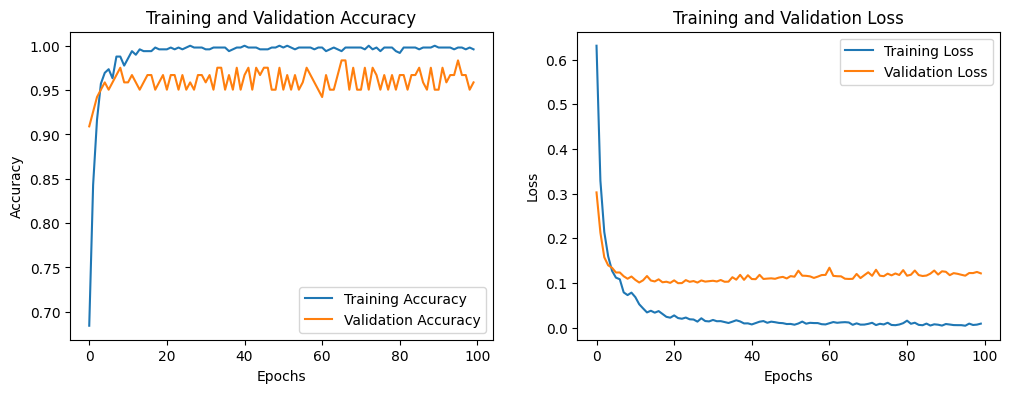

4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - accuracy: 0.9543 - loss: 0.1608
Test Accuracy: 95.87%


In [3]:
input_shape = (224, 224, 3)


base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False


model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


history = model.fit(
    train_generator,
    epochs=100,  
    validation_data=test_generator
)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

SAVE MODEL .H5

In [15]:
# model.summary()
# Menyimpan arsitektur model ke file JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Menyimpan bobot model ke file HDF5
model.save_weights("model_weights.weights.h5")


In [14]:
from tensorflow.keras.models import model_from_json

# Memuat arsitektur model dari file JSON
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)

# Memuat bobot ke dalam model dari file dengan ekstensi yang benar
loaded_model.load_weights("model_weights.weights.h5")

SAVE MODEL .JSON

In [10]:
saved_model_path = "./my_model.h5"

model.save(saved_model_path)

SAVE MODEL PICKLE

In [11]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [12]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


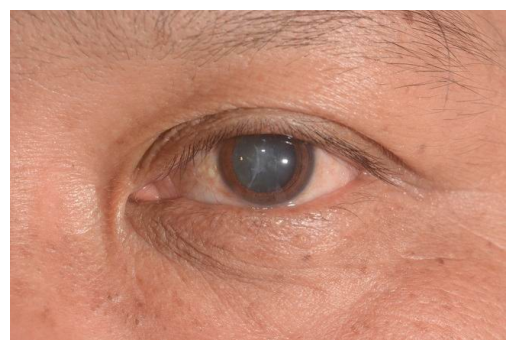

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Ganti dengan path ke file gambar yang ingin Anda unggah
image_path = "uji/cataract2.jpg"

# Buka gambar menggunakan PIL
image = Image.open(image_path)

# Menampilkan gambar
plt.imshow(image)
plt.axis('off')
plt.show()

# Mengonversi gambar menjadi array numpy
image_array = np.array(image.resize((224, 224))) / 255.0  # Mengubah ukuran dan normalisasi
image_array = np.expand_dims(image_array, axis=0)  # Menambahkan di



In [5]:

# Melakukan prediksi
prediction = model.predict(image_array)

# Menampilkan hasil prediksi
if prediction[0][0] > 0.5:
    print("Gambar tersebut diprediksi masuk kelas Normal")
else:
    print("Gambar tersebut diprediksi masuk kelas Cataract")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Gambar tersebut diprediksi masuk kelas Cataract
